In [5]:
import pandas as pd
import numpy as np
import os
#import matplotlib.pyplot as plt
import time

In [6]:
df=pd.read_csv("Datasets_1/New_Reliance Industries Ltd.csv")

In [7]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2008-01-01,715.715759,717.944580,702.119629,705.376221,630.190979,4864461.0,Reliance Industries Ltd
1,2008-01-02,707.047913,714.229797,696.225464,708.719543,633.178162,12588005.0,Reliance Industries Ltd
2,2008-01-03,706.304932,725.621826,700.918518,719.108582,642.459778,13939233.0,Reliance Industries Ltd
3,2008-01-04,719.182861,747.861023,719.182861,741.223938,662.217773,16366255.0,Reliance Industries Ltd
4,2008-01-07,736.716675,750.387085,733.051392,747.972473,668.247131,12650730.0,Reliance Industries Ltd


In [8]:
df=df[["Close"]].copy()
df.describe()

,Close
count,2950.000000
mean,602.502816
std,282.745533
min,252.481720
25%,429.834969
50%,497.447190
75%,630.433502
max,1594.832642


In [9]:
#check if the data is stationary/not (using dickey fuller test)
from statsmodels.tsa.stattools import adfuller

In [10]:
result=adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 1.346044891054838
p-value: 0.9968547019250674


c:\Program Files\Python310\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


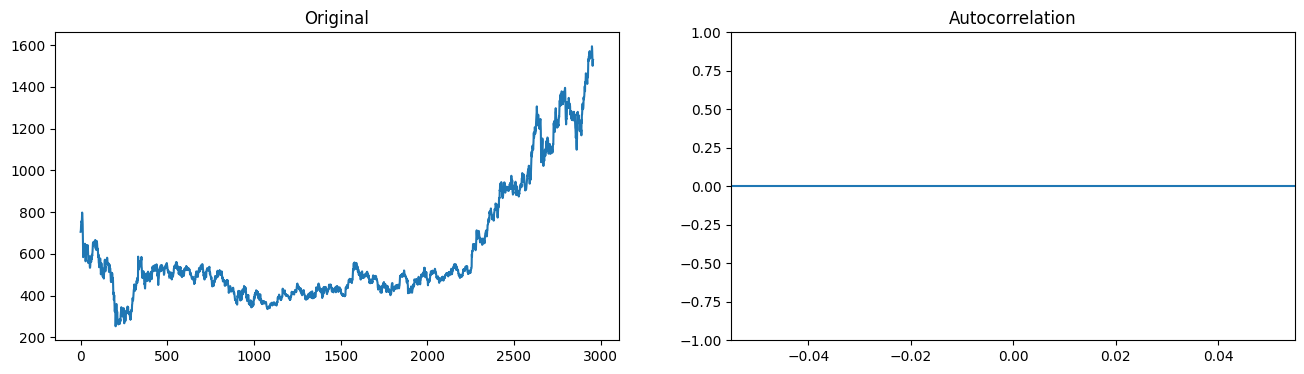

In [14]:
#p value is >0.05, data is not stationary and differencing should be applied
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, (ax1,ax2) =plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

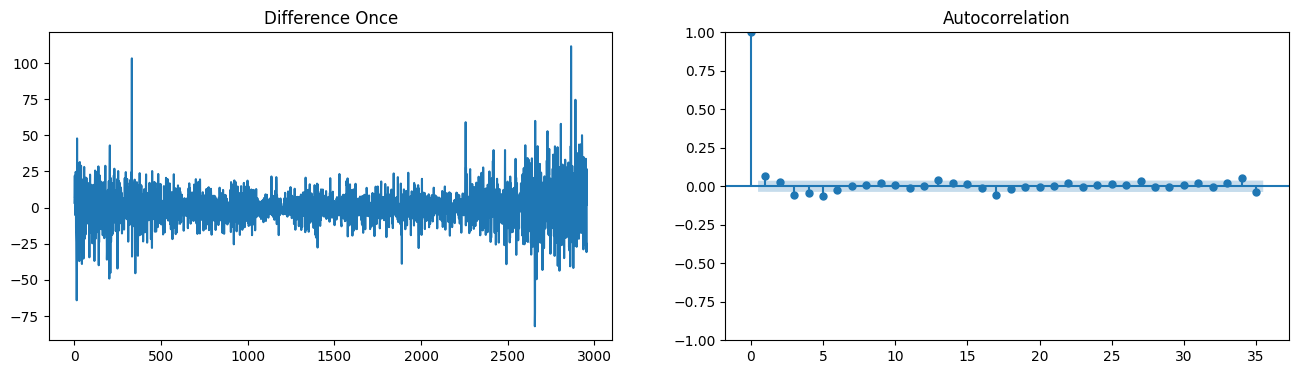

In [17]:
diff=df.Close.diff().dropna()
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff,ax=ax2);

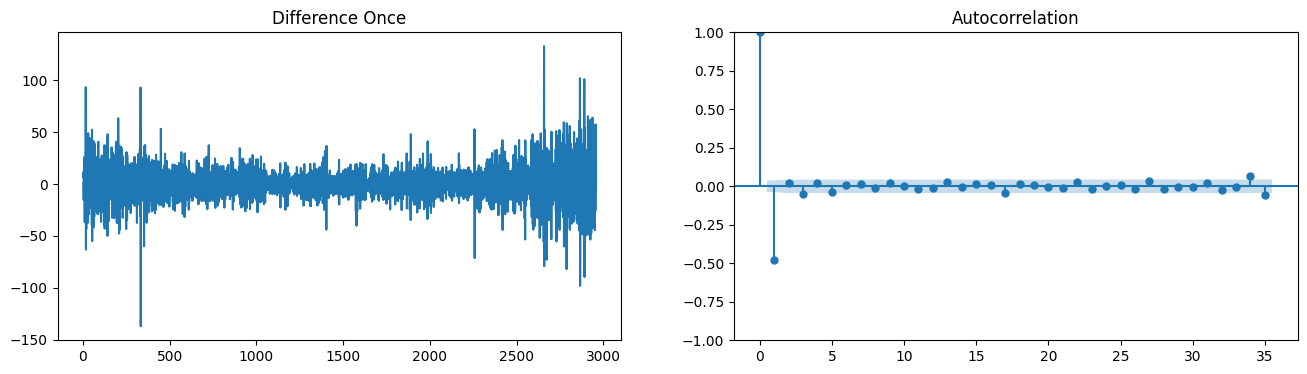

In [18]:
diff=df.Close.diff().diff().dropna()
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff,ax=ax2);

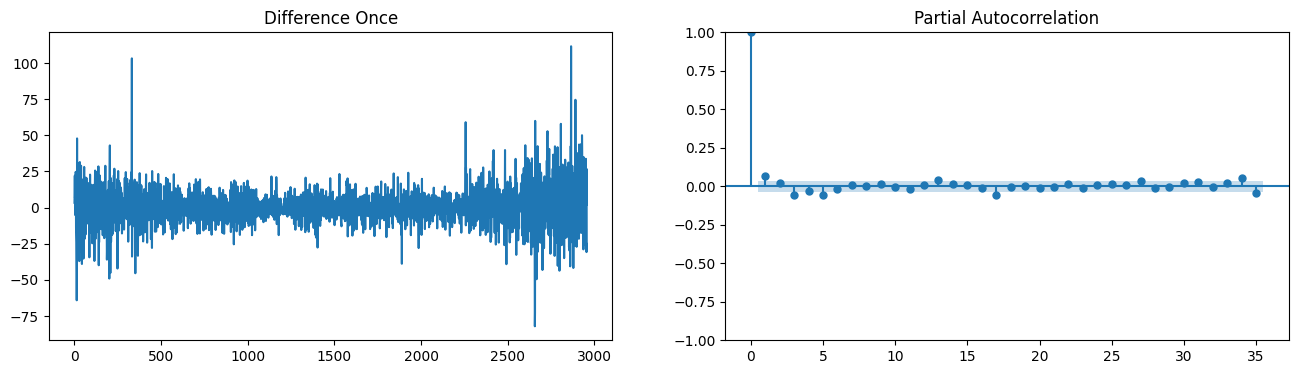

In [24]:
from pmdarima.arima.utils import ndiffs
#ndiffs(df.Close,test="adf")
from statsmodels.graphics.tsaplots import plot_pacf
diff=df.Close.diff().dropna()
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1);
plot_pacf(diff,ax=ax2);


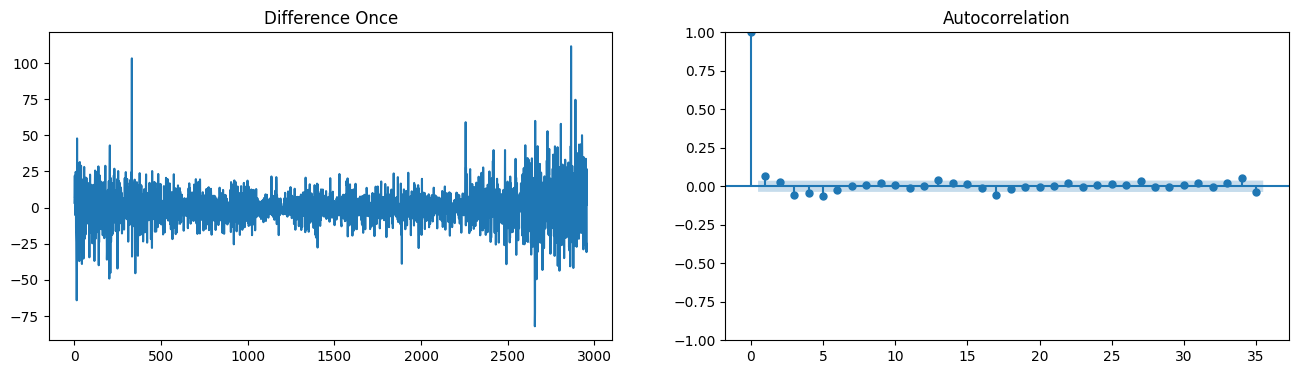

In [25]:
diff=df.Close.diff().dropna()
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1);
plot_acf(diff,ax=ax2);

In [79]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df.Close,order=(1,1,1))
model_fit=model.fit()

In [80]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2957
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11553.892
Date:                Mon, 06 Nov 2023   AIC                          23113.784
Time:                        19:19:51   BIC                          23131.759
Sample:                             0   HQIC                         23120.254
                               - 2957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1736      0.174      0.995      0.320      -0.168       0.516
ma.L1         -0.1075      0.179     -0.600      0.548      -0.458       0.243
sigma2       147.8381      1.793     82.474      0.0

In [81]:
residuals=pd.DataFrame(model_fit.resid)

(array([5.38558050e-03, 7.33181191e-03, 8.63073798e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.31536899e-06]),
 array([-80.14884456,  -1.596338  ,  76.95616855, 155.50867511,
        234.06118167, 312.61368822, 391.16619478, 469.71870133,
        548.27120789, 626.82371444, 705.376221  ]),
 <BarContainer object of 10 artists>)

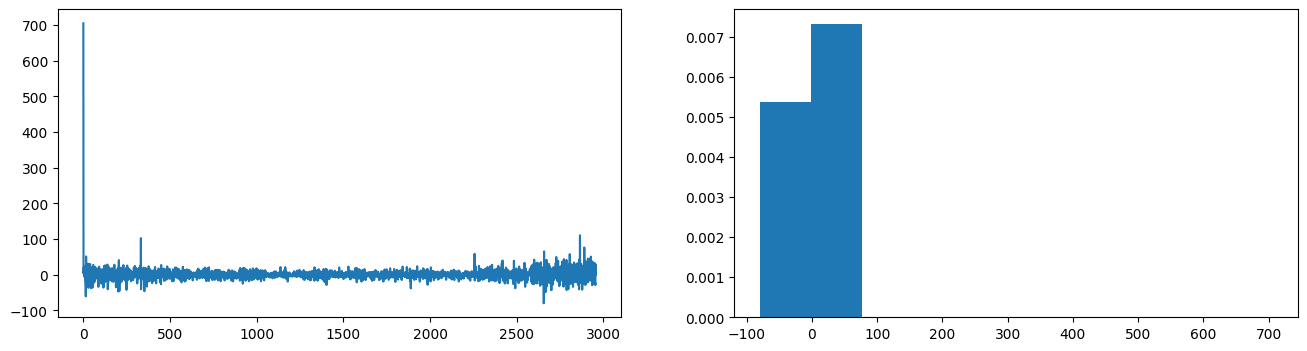

In [82]:
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

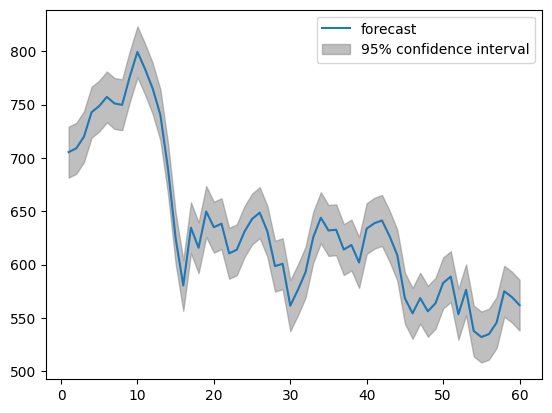

In [83]:
#Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,start=1,end=60,dynamic=False);

In [84]:
df.Close

0        705.376221
1        708.719543
2        719.108582
3        741.223938
4        747.972473
           ...     
2952    1556.644531
2953    1531.928833
2954    1501.170410
2955    1527.867310
2956    1529.699951
Name: Close, Length: 2957, dtype: float64

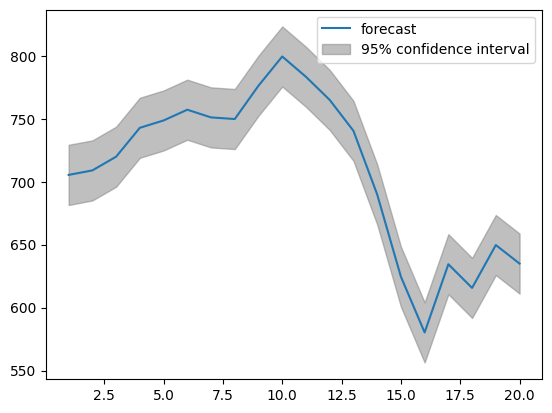

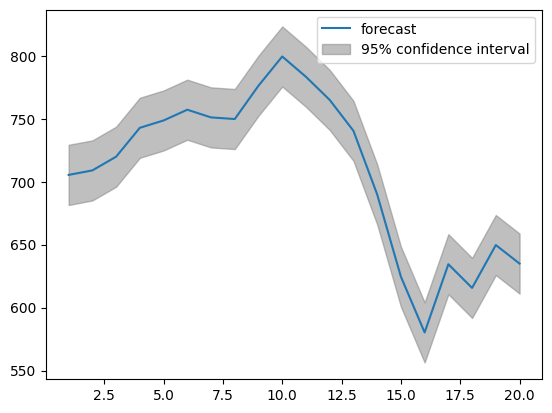

In [85]:
plot_predict(model_fit,start=1,end=20,dynamic=False)


In [89]:
next_day_price=model_fit.forecast(100,alpha=0.05)
print(next_day_price)

2957    1529.985022
2958    1530.034503
2959    1530.043091
2960    1530.044582
2961    1530.044841
           ...     
3052    1530.044895
3053    1530.044895
3054    1530.044895
3055    1530.044895
3056    1530.044895
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [90]:
df.Close

0        705.376221
1        708.719543
2        719.108582
3        741.223938
4        747.972473
           ...     
2952    1556.644531
2953    1531.928833
2954    1501.170410
2955    1527.867310
2956    1529.699951
Name: Close, Length: 2957, dtype: float64